In [31]:
import pandas as pd
data = pd.read_csv('values_from_the_instrument.zip')

C:\Users\dennn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dennn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dennn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

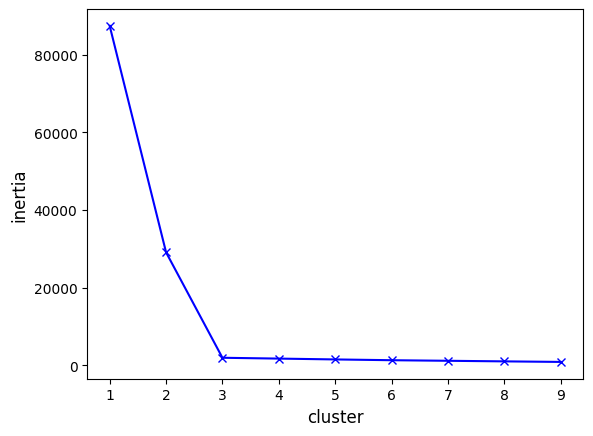

In [32]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
X=data
# функция, которая принимает количество кластеров для k-means и матрицу с признаками объектов и возвращает инерцию 
def get_inertia(cluster_num, X):
# инициализируем алгоритм кластеризации
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
# запускаем алгоритм k-means
    k_means.fit(X)
# находим значение инерции
    inertia = k_means.inertia_
# возвращаем значение инерции
    return inertia

# создаём пустой список для значений инерции
inertia = []
# итерируемся по разным размерам кластеров (от 1 до 9) и сохраняем значение инерции для каждого кластера
for cluster_num in range(1, 10):
# сохраняем значения
    inertia.append(get_inertia(cluster_num, X))

# визуализируем, как менялась инерция в зависимости от количества кластеров
# задаём названия осям x и y
plt.xlabel("cluster", fontsize=12)
plt.ylabel("inertia", fontsize=12)
# рисуем изменение инерции
plt.plot([i for i in range(1, 10)], inertia, 'xb-')

<AxesSubplot: xlabel='x1', ylabel='x2'>

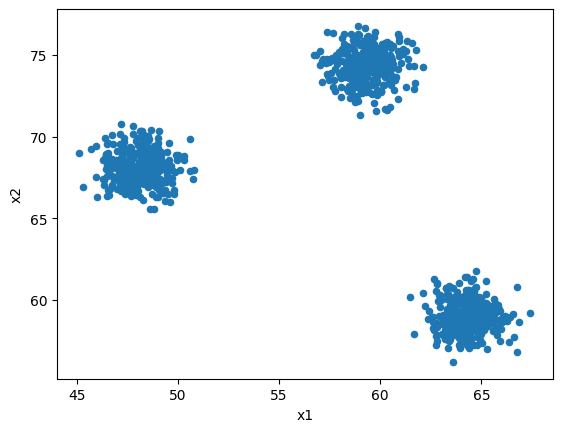

In [33]:
data.plot.scatter(x='x1',y='x2')

In [34]:
from sklearn import metrics
from sklearn.metrics.cluster import homogeneity_score


print(homogeneity_score(labels_true=[1, 2, 2, 1, 0], labels_pred=[1, 0, 2, 1, 2]))

0.737175493807016


<AxesSubplot: xlabel='year', ylabel='price'>

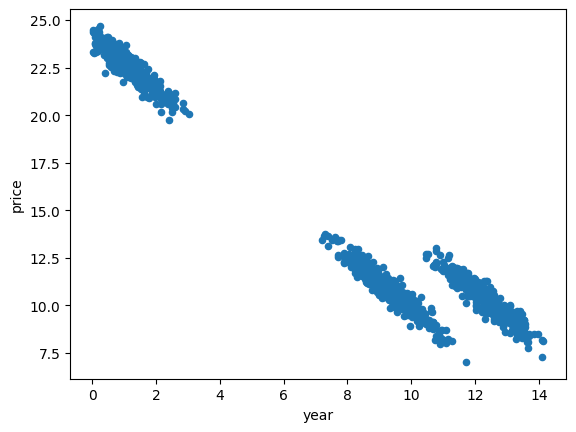

In [35]:
data = pd.read_csv('housing.csv')
data.plot.scatter(x='year', y='price')


In [36]:
from sklearn.mixture import GaussianMixture
gm_clustering = GaussianMixture(n_components=3, random_state=42)

# обучаем модель 
gm_clustering.fit(data)

# для матрицы X получаем предсказания, к какому кластеру принадлежат объекты
data['cluster'] = gm_clustering.predict(data)

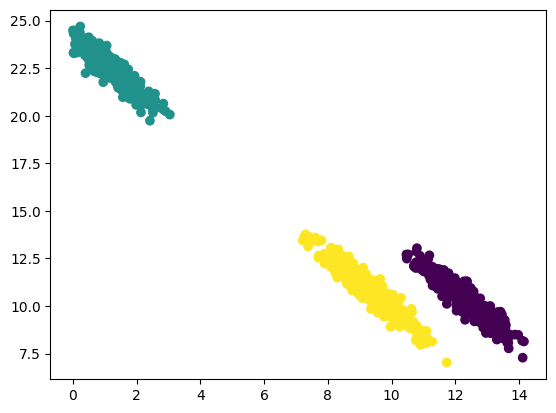

In [37]:
plt.scatter(x=data['year'], y=data['price'], c=data['cluster'])

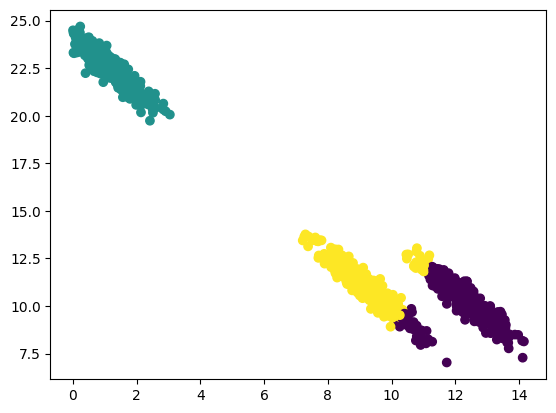

In [38]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, n_init='auto')

data['cluster'] = kmeans.fit_predict(data.drop(columns=['cluster']))

plt.scatter(x=data['year'], y=data['price'], c=data['cluster'])

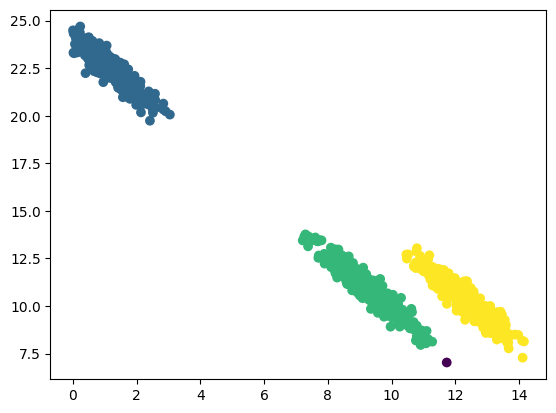

In [39]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.7, min_samples=5)
data['cluster'] = dbscan.fit_predict(data.drop(columns='cluster'))

plt.scatter(x=data['year'], y=data['price'], c=data['cluster'])

In [41]:
from sklearn.datasets import fetch_openml


dataset = fetch_openml("mnist_784")


C:\Users\dennn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


ValueError: All arrays must be of the same length

In [48]:
dataset['target']

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']